In [116]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg

# Load data from a two-column ascii file
x = np.genfromtxt('ex5/ex5Linx.dat')
y = np.genfromtxt('ex5/ex5Liny.dat')

x = np.expand_dims(x, axis=1)
x = np.insert(x, 0, 1, 1)
y = np.expand_dims(y, axis=1)

# Plot the training data
plt.plot(x[:,1], y, 'ro', markersize=10)

In [117]:
# Hack to stack columns with powers off a column
# Perhaps there is a better way to do this

# Our features are all powers of x from x^0 to x^5
nc = np.array([1,1,1,1])

for i in x:
    nc = np.vstack((nc, np.array([i[1] ** 2, i[1] ** 3, i[1] ** 4, i[1] ** 5])))

x = np.c_[x, nc[1:]]

theta = np.zeros(np.shape(x[0]))
theta = theta.transpose()

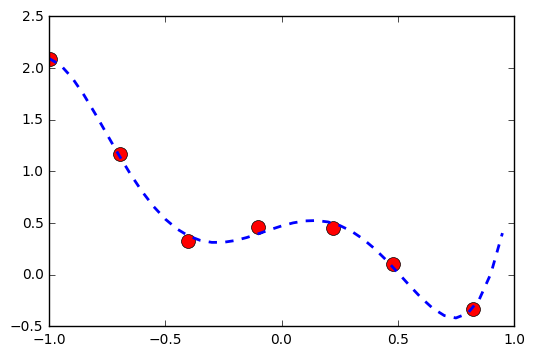

In [118]:
# The regularization parameter

lmbda = 0

# Closed form solution from normal equations
dia_m = lmbda * np.eye(6) # the extra regularization terms

theta = linalg.solve( (x.transpose().dot(x) + dia_m), (x.transpose().dot(y)) )

# Plot the linear fit
# Our training data was only a few points, so we need
# to create a denser array of x-values for plotting

x_vals = np.arange(-1, 1, 0.05)
features = np.array([1,1,1,1,1,1])
for i in x_vals:
    features = np.vstack((features, np.array([ i**j for j in range(6)]) ))

plt.plot(x_vals, features[1:].dot(theta), '--', linewidth=2)
plt.show()